In [1]:
import statistics
import re

In [2]:
def extract_substrings_in_brackets(input_string):
    # Define the regular expression pattern to match substrings inside square brackets
    pattern = r'\[(.*?)\]'

    # Use re.findall() to find all matches of the pattern in the input string
    matches = re.findall(pattern, input_string)

    # Return the list of matches
    return matches

In [3]:
def read_files_and_create_lists(file_paths):
    # Create an empty list for each file
    lists = [[] for _ in range(len(file_paths))]
    results = []

    # Iterate through each file
    for i, file_path in enumerate(file_paths):
        # Open the file
        with open(file_path, 'r') as file:
            # Read each line in the file
            for line in file:
                # Split the line into index and value
                index,value = line.split(',', 1)
                pattern = r'\[(.*?)\]'
                # print(value)
                value = re.findall(pattern,value)
                # print(value[0])
                value = float(value[0][0:])
                # if(value[0][0]=='-'):
                #     # print(value[0])
                #     value = float(value[0][1:])
                #     value *= -1
                #     # print(value)
                # else:
                #     value = float(value[0])
                #     # print(value)
                lists[i].append(value)
                # print(value)
                # print(int(index[0]))
                # Fill the value at the respective index in the list

        # Additional processing
        episode_durations = lists[i]
        ap = True
        for j in range(15, len(episode_durations)):
             avg = sum(episode_durations[j-10:j]) / 10
             if avg >= 200:
                ap = False
                results.append(j)
                break
        if ap == True:
            results.append(500)

    return lists, results

def calculate_mean_of_lists(lists):
    # Transpose the lists
    transposed_lists = list(zip(*lists))

    # Calculate the mean of each column
    means = [sum(column) / len(column) for column in transposed_lists]

    return means

def calculate_std_dev_of_lists(lists):
    # Transpose the lists
    transposed_lists = list(zip(*lists))

    # Calculate the standard deviation of each column
    std_devs = [statistics.stdev(column) for column in transposed_lists]

    return std_devs

# Example usage
seeds = [219, 4065, 987, 434, 4218, 846, 2647, 4283, 1190, 4372]
file_paths = []
file_paths2 = []

for i in range(10):
    path1 = str(seeds[i])+"_PN.txt"
    path2 = str(seeds[i])+"_NN.txt"
    file_paths.append(path1)
    file_paths2.append(path2)

lists, results = read_files_and_create_lists(file_paths)
mean_list = calculate_mean_of_lists(lists)
std_dev_list = calculate_std_dev_of_lists(lists)

lists2, results2 = read_files_and_create_lists(file_paths2)
mean_list2 = calculate_mean_of_lists(lists2)
std_dev_list2 = calculate_std_dev_of_lists(lists2)


In [4]:
print("Mean List:", mean_list)
print("Standard Deviation List:", std_dev_list)
print("Results:", results)

Mean List: [-166.25465, -173.24020000000002, -153.04344999999998, -141.58606000000003, -256.13989000000004, -149.00113, -207.94446000000002, -152.21506000000002, -156.71436, -152.65447, -174.67177, -206.37660999999997, -137.77642, -213.75412999999998, -138.12676000000002, -211.00605000000002, -130.90185000000002, -161.38101, -153.25738, -140.13227999999998, -148.09345000000002, -180.32014999999998, -129.21654, -162.80387000000002, -94.80002999999999, -104.6087, -121.42026000000001, -122.9944, -120.30202999999999, -116.57791999999999, -106.73969, -103.76478, -100.91338, -78.49508, -77.51225000000001, -86.3946, -88.81489, -60.34978000000001, -83.70942, -72.4977, -92.50616, -58.5904, -80.39648, -57.55233, -65.57827, -55.72896000000001, -54.79239, -48.863099999999996, -50.68526, -27.53558, -31.537889999999994, -35.97157, -51.16426, -50.91175, -41.97809, -10.008449999999998, 0.1652499999999982, 2.2925500000000008, -12.403339999999996, -25.419410000000003, -29.97919, 16.18847, 9.057940000000

In [5]:
print("Mean List:", mean_list2)
print("Standard Deviation List:", std_dev_list2)
print("Results:", results2)

Mean List: [-166.25465, -171.84623000000002, -145.40542, -138.36653, -254.00162, -143.45743, -217.55092, -129.706, -140.84551000000002, -140.06588000000002, -198.79422000000005, -198.40139, -148.91531, -205.68447999999998, -147.59276000000003, -211.33157999999997, -142.1995, -124.46302, -146.06836, -140.42941, -86.52401, -156.12833, -162.73863, -177.66716000000002, -108.37480000000002, -118.93762, -123.71253000000002, -129.37407000000002, -117.10024000000001, -134.2309, -83.67599999999997, -120.76017000000002, -103.96750999999999, -85.45337, -92.93946, -81.54836, -90.38603, -54.31317, -86.10526999999999, -72.52875, -98.13729, -57.53625999999999, -54.11079000000001, -79.00665, -97.64693999999999, -48.40856, -77.80856, -56.57539999999999, -37.36974000000001, -32.73437, -50.62809, -29.656260000000003, -24.833180000000002, -22.960620000000002, -39.806779999999996, -9.60475, -49.98116, -34.29019000000001, -6.172330000000002, -34.691720000000004, -2.368200000000003, -24.19968, 42.12701, 15.7

In [6]:
print(sum(results)/len(results))

320.0


In [7]:
print(sum(results2)/len(results2))

253.5


In [8]:
sum(results)/len(results) - sum(results2)/len(results2)

66.5

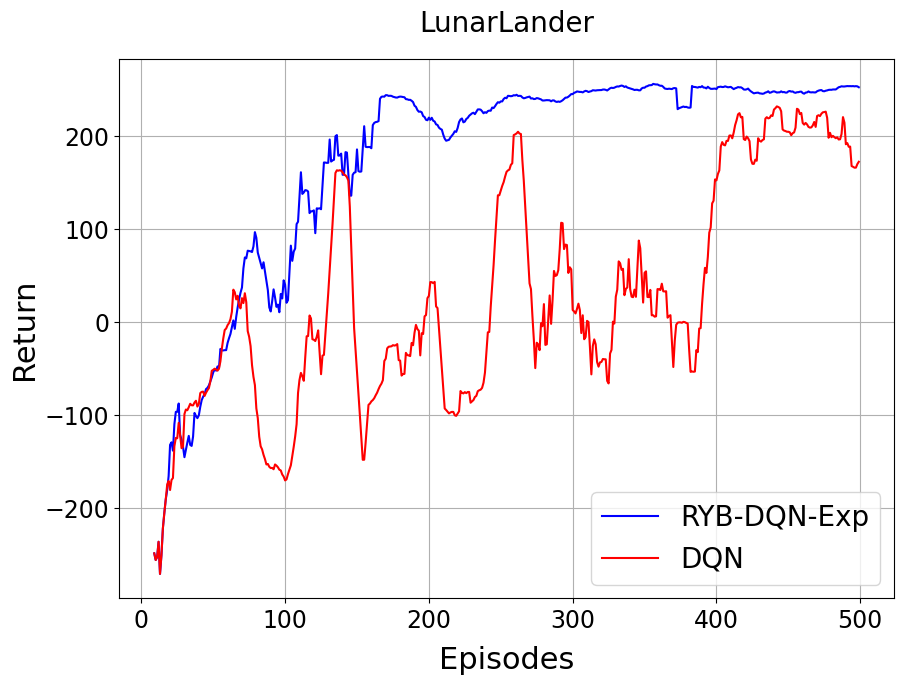

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def plot_moving_averages(list1, list2):
    moving_avg1 = np.convolve(list1, np.ones(10)/10, mode='valid')
    moving_avg2 = np.convolve(list2, np.ones(10)/10, mode='valid')

    # Plot the moving averages
    plt.figure(figsize=(10, 7))
    plt.plot(np.arange(9, len(list1)), moving_avg2, color='blue', label='RYB-DQN-Exp')
    plt.plot(np.arange(9, len(list2)), moving_avg1, color='red', label='DQN')

    # Highlighted area coordinates
    highlight_x = 25
    highlight_y = moving_avg2[highlight_x]

    # Add labels, title, legend, etc.
    plt.title('LunarLander', fontsize=20,pad=20)  # Add title
    plt.xlabel('Episodes', fontsize=22,labelpad=10)
    plt.ylabel('Return', fontsize=22)
    plt.legend(fontsize=20, loc='lower right')  # Placing legend at the lower right corner
    plt.grid(True)


    plt.tick_params(axis='x', labelsize=17)  # Adjust font size for x-axis
    plt.tick_params(axis='y', labelsize=17)  # Adjust font size for y-axis


    plt.show()


ind = 3
plot_moving_averages(lists[ind], lists2[ind])

In [ ]:
print(len(lists[ind]))

500
